In [2]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import requests

In [3]:
#code for scraping news articles from the Google News

#defining the main link and root. I have used the google news search for President Biden for this project
root= "https://www.google.com/"
link= "https://www.google.com/search?q=biden&sca_esv=561640084&rlz=1C1GCEA_enUS1051US1051&tbm=nws&source=lnt&tbs=qdr:d&sa=X&ved=2ahUKEwjlw7zgwYeBAxWdFzQIHZCjA9oQpwV6BAgCEAg&biw=1920&bih=963&dpr=1"



def news(link):
  req= Request(link, headers={'User-Agent' : 'Mozilla/5.0'})
  webpage= urlopen(req).read()
  with requests.Session() as c:
    soup= BeautifulSoup(webpage, 'html5lib')
    #print(soup)

    #extracting the link, title and description of all articles in the web results
    for item in soup.find_all('div',attrs={'class': 'Gx5Zad fP1Qef xpd EtOod pkphOe'}):
      raw_link=(item.find('a', href=True)['href'])
      link=(raw_link.split("/url?q=")[1]).split("&sa=U&")[0]


      title= (item.find('div',attrs={'class':'j039Wc'}).get_text())
      title=title.replace(","," ")

      description = (item.find('div',attrs={'class':'BNeawe s3v9rd AP7Wnd'}).get_text())
      description=description.split("...")[0]
      description=description.replace(","," ")

      print(title)
      print(description)
      print(link)
      #print(item)

      #extracting all the data into a csv format for further analysis
      document=open("scraped-data.csv","a")
      document.write("{},{},{} \n".format(title,description,link))
      document.close()

  #unning a loop for all the pages in the search results and not limiting to just one page
  next=soup.find('a', attrs={'aria-label':'下一頁'})
  if next is not None:
      next_href = next['href']
  else:
    return
  link= root+next_href
  news(link)

news(link)

President Joseph R. Biden  Jr. Approves Florida Disaster Declaration
Today  President Joseph R. Biden  Jr. declared that a major disaster exists in the State of Florida and ordered Federal aid to supplement State  tribal 
https://www.whitehouse.gov/briefing-room/presidential-actions/2023/08/31/president-joseph-r-biden-jr-approves-florida-disaster-declaration-4/
Biden says he'll travel to Florida on Saturday following Hurricane Idalia
President Joe Biden said Thursday that he plans to travel to Florida Saturday morning after Hurricane Idalia battered the state earlier this week.6 hours ago
https://www.cnn.com/2023/08/31/politics/biden-florida-disaster-declaration/index.html
Biden to travel to Florida on Saturday to visit areas hit by Hurricane Idalia
Mr. Biden announced the trip while visiting FEMA headquarters to thank emergency personnel for aiding the responses to the Maui wildfires and Hurricane Idalia.6 hours ago
https://www.cbsnews.com/news/joe-biden-hurricane-idalia-florida-visit

In [4]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [5]:
#code to perform sentiment analysis on the data via thorough data cleaning and EDA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

df = pd.read_csv("newdata.csv")
df.head()

,Title,Description,Source
0,President Joseph R. Biden Jr. Approves Florid...,Today President Joseph R. Biden Jr. declared...,https://www.whitehouse.gov/briefing-room/presi...
1,President Biden approves Disaster Declaration ...,On Thursday President Joe Biden approved a Di...,https://www.wesh.com/article/president-biden-d...
2,Biden approves disaster declaration,TALLAHASSEE —,https://www.mysuncoast.com/2023/08/31/biden-ap...
3,Why Biden is now routinely taking the short st...,President Biden boards Air Force One at Peters...,https://www.npr.org/2023/08/31/1196803354/bide...
4,Remarks by President Biden on the Whole-of-Gov...,Remarks by President Biden on the Whole-of-Gov...,https://www.whitehouse.gov/briefing-room/speec...


In [6]:
#providing a variable name to the sentiment intensity analyzer
analyzer= SentimentIntensityAnalyzer()

In [7]:
#defining the different buckets for reviews
negative=[]
neutral=[]
positive=[]

for n in range(df.shape[0]):
  title=df.iloc[n,0]
  desc=df.iloc[n,1]

  title_analyzed=analyzer.polarity_scores(title)
  desc_analyzed=analyzer.polarity_scores(desc)
  negative.append(((title_analyzed['neg'])+(desc_analyzed['neg']))/2)
  neutral.append(((title_analyzed['neu'])+(desc_analyzed['neu']))/2)
  positive.append(((title_analyzed['pos'])+(desc_analyzed['pos']))/2)


df["Negative"]=negative
df["Neutral"]=neutral
df["Positive"]=positive


print(df.head())

                                               Title  \
0  President Joseph R. Biden  Jr. Approves Florid...   
1  President Biden approves Disaster Declaration ...   
2                Biden approves disaster declaration   
3  Why Biden is now routinely taking the short st...   
4  Remarks by President Biden on the Whole-of-Gov...   

                                         Description  \
0  Today  President Joseph R. Biden  Jr. declared...   
1  On Thursday  President Joe Biden approved a Di...   
2                                      TALLAHASSEE —   
3  President Biden boards Air Force One at Peters...   
4  Remarks by President Biden on the Whole-of-Gov...   

                                              Source  Negative  Neutral  \
0  https://www.whitehouse.gov/briefing-room/presi...     0.226   0.6760   
1  https://www.wesh.com/article/president-biden-d...     0.195   0.6215   
2  https://www.mysuncoast.com/2023/08/31/biden-ap...     0.233   0.6135   
3  https://www.npr.org/202

In [8]:
print('Negative Sentiment:',df["Negative"].mean())
print('Positive Sentiment:',df["Positive"].mean())
print('Neutral Sentiment:',df["Neutral"].mean())

Negative Sentiment: 0.08165396825396826
Positive Sentiment: 0.07213333333333334
Neutral Sentiment: 0.8462190476190475


Upon examining news articles about Joe Biden, it's clear that while many are neutral, negative sentiment outweighs positive. This suggests that criticisms and concerns dominate the coverage more than positive aspects of his actions or policies. This could be due to the challenges his administration faces. While there are likely achievements, they seem to be overshadowed by these concerns in the media narrative.

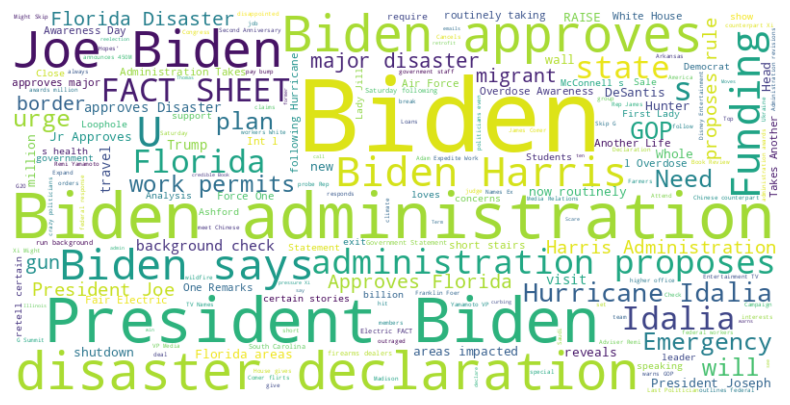

In [11]:
#Generating a word cloud from the description of the news articles
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate all text data into a single string
text_corpus = ' '.join(df['Title'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The analysis of recent news articles pertaining to President Biden, depicted through a dynamic word cloud, yields insightful observations. Notably, the integration of terms related to the recent Florida hurricane provides contextual depth to the discourse. This confluence of terminology offers a nuanced perspective on the concomitance of President Biden's actions with the aftermath of the hurricane.

In this word cloud, a binary narrative emerges. Positive terms reflect accomplishments and policy initiatives of the Biden administration, while the prevalence of negative terms implies critical evaluations and challenges. This dualism mirrors the intricate dynamics of contemporary political environments.

Furthermore, the incorporation of lexemes associated with the Florida hurricane accentuates the interplay between discrete events and policy deliberations. This synergy underscores the multifaceted role that leaders like President Biden must navigate, encompassing both immediate exigencies such as natural disasters and overarching governance goals.

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

<ipython-input-19-caa614f03de5>:52: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  plt.tight_layout()
<ipython-input-19-caa614f03de5>:52: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  plt.tight_layout()
<ipython-input-19-caa614f03de5>:52: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  fig.canvas.print_

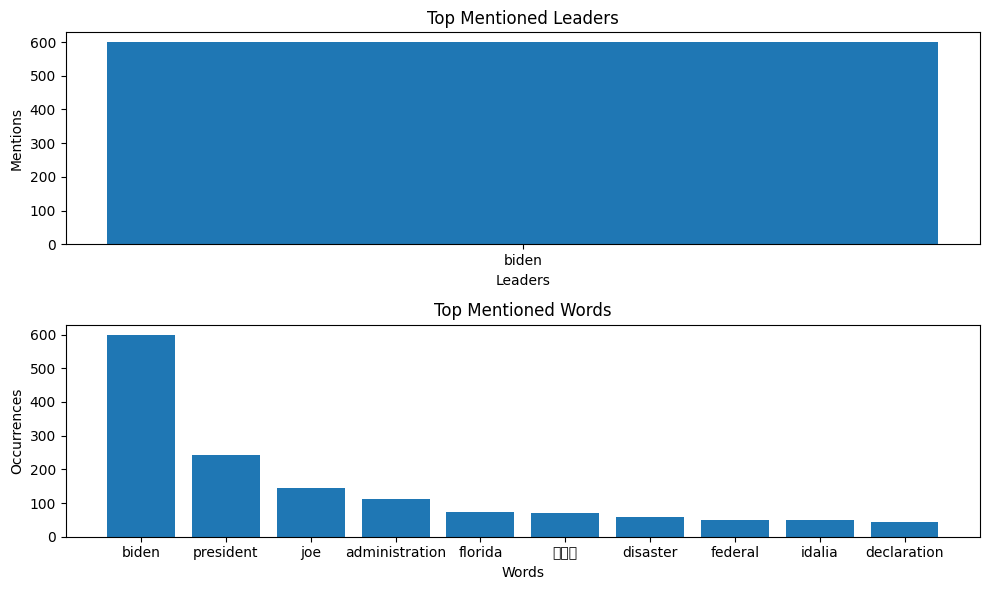

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Data preprocessing
stop_words = set(stopwords.words("english"))
cleaned_data = []

for index, row in df.iterrows():
    text = row["Title"] + " " + row["Description"]
    words = word_tokenize(text)
    cleaned_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    cleaned_data.extend(cleaned_words)



# Identify top leaders
leaders_count = {}
known_leaders = ["biden", "kamala", "harris", ...]  # Add more leader names

for word in cleaned_data:
    if word in known_leaders:
        leaders_count[word] = leaders_count.get(word, 0) + 1

# Identify top words
word_count = {}

for word in cleaned_data:
    word_count[word] = word_count.get(word, 0) + 1

# Sort dictionaries by values
top_leaders = sorted(leaders_count.items(), key=lambda x: x[1], reverse=True)[:5]
top_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:10]

# Data visualization
plt.figure(figsize=(10, 6))

# Top Leaders Bar Graph
plt.subplot(2, 1, 1)
plt.bar(*zip(*top_leaders))
plt.title("Top Mentioned Leaders")
plt.xlabel("Leaders")
plt.ylabel("Mentions")

# Top Words Bar Graph
plt.subplot(2, 1, 2)
plt.bar(*zip(*top_words))
plt.title("Top Mentioned Words")
plt.xlabel("Words")
plt.ylabel("Occurrences")

plt.tight_layout()
plt.show()